In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit

# gaia physical related parameters distribution calculate

## commonly use

func

In [ ]:
dty = np.uint32
def physical_related_distribution(cols, data='a', bin=[0.1,0.1], range=None):
    # read path
    with open('/media/hyz/dwarfcave/data/gaiaDR3/ms/gaiasource_path.list','r') as _list:
        path = _list.readlines()
        if type(data) == int:
            path = path[0:data]
        elif data == 'a':
            pass
        
    # make grid
    if range == None:
        range = [[2,25],[0,20000]]
    bins = np.array([23/bin[0],20000/bin[1]],dtype=np.uint16)
    edges = np.histogramdd(np.empty((1,2)),bins,range)[1]
    count = np.empty(bins)
    
    try:
        start
    except:
        start = time.time()
        
    # statistics
    for _,_line in enumerate(path):
        _p = _line.strip()
        print("reading:%s ==> "%_,_p)
        _d = pd.read_csv(_p,comment='#',usecols=cols)
        if _ == 0:
            print('colume list: ===> ',_d.columns)
        _d.dropna(inplace=True)
        # _d = _d[_d['parallax_over_error']>1]
        # _d['parallax'] = 1000/_d['parallax']
        # _d = _d[np.isinf(_d['parallax'])==False]
        _d = _d[cols].to_numpy()
        count = np.array(np.histogramdd(_d,bins=bins,range=range)[0] + count, dtype=dty)
        if (_+1)%10 == 0:
            ti = time.time() - start
            print('time used in %02d: ===>\t\t'%(_+1),'%.02fs / %.02fh'%(ti,ti/3600))
        
    return [edges, count]


main

In [ ]:
def main_phy():
    start = time.time()
    
    # position: ra, ra_error, dec, dec_error, parallax, parallax_over_error, radial_velocity,radial_velocity_error,
    # phot:     phot_g_mean_flux_over_error, phot_g_mean_mag, bp_rp, 
    # distance: distance_gspphot, distance_gspphot_upper,
    # distinction/redshift:     ag_gspphot, ebpminrp_gspphot

    edge, h = physical_related_distribution(cols=[''],data='a',bin=[],range=[[],[]])
    
    end = time.time()
    tm = end - start
    print('----------------time in main func: %.02fs / %.02fh'%(tm,tm/3600))
    np.set_printoptions(threshold=np.inf)
    save_pre = 'gaia_mag_parallax_distribution_0.1_0.1'
    np.save('%s.npy'%save_pre, h)
    np.save('%s.edge.npy'%save_pre, np.array(edge))
    tw = time.time() - end
    tu = time.time() - start
    print('----------------time in write: %.02fs / %.02fh'%(tw,tw/3600))
    print('----------------time overused: %.02fs / %.02fh'%(tu,tu/3600))


if __name__ == '__main__':
    main_phy()


## mag parallax distribution calculate

func

In [4]:
dty = np.uint32
def mag_para_distribution(data='a',coor='icrs',bin_mag=0.1,bin_r=10):
    # read path
    with open('/media/hyz/dwarfcave/data/gaiaDR3/ms/gaiasource_path.list','r') as _list:
        path = _list.readlines()
        if type(data) == int:
            path = path[0:data]
        elif data == 'a':
            pass
        
    # make grid
    range = [[2,25],[0,20000]]
    bins = np.array([23/bin_mag,20000/bin_r],dtype=np.uint32)
    edges = np.histogramdd(np.empty((1,2)),bins,range)[1]
    count = np.empty(bins)
    
    try:
        start
    except:
        start = time.time()
        
    # statistics
    for _,_line in enumerate(path):
        _p = _line.strip()
        print("reading:%s ==> "%_,_p)
        _d = pd.read_csv(_p,comment='#',usecols=['phot_g_mean_mag','parallax','parallax_over_error'])
        if _ == 0:
            print('colume list: ===> ',_d.columns)
        _d.dropna(inplace=True)
        _d = _d[_d['parallax_over_error']>1]
        _d['parallax'] = 1000/_d['parallax']
        _d = _d[np.isinf(_d['parallax'])==False]
        _d = _d[['phot_g_mean_mag','parallax']].to_numpy()
        count = np.array(np.histogramdd(_d,bins=bins,range=range)[0] + count, dtype=dty)
        if (_+1)%10 == 0:
            ti = time.time() - start
            print('time used in %02d: ===>\t\t'%(_+1),'%.02fs / %.02fh'%(ti,ti/3600))
        
    return [edges, count]


main

In [5]:
def main_mp():
    start = time.time()
    edge, h = mag_para_distribution(data='a')
    end = time.time()
    tm = end - start
    print('----------------time in main func: %.02fs / %.02fh'%(tm,tm/3600))
    np.set_printoptions(threshold=np.inf)
    save_pre = 'gaia_mag_parallax_distribution_0.1_0.1'
    np.save('%s.npy'%save_pre, h)
    np.save('%s.edge.npy'%save_pre, np.array(edge))
    with open('%s.txt'%save_pre,'w') as w:
        header = '# gaia aparent magnitude and parallax distribution in 0.1 deg and 1000/(mas)--10.\n# created by hyz in 2022.12.08\n\ngrid:'
        w.write(header)
        w.write(str(edge[0])+'\n')
        w.write(str(edge[1])+'\n')
        for _m,p in enumerate(h):
            w.write(str(p)+'\t')

    tw = time.time() - end
    tu = time.time() - start
    print('----------------time in write: %.02fs / %.02fh'%(tw,tw/3600))
    print('----------------time overused: %.02fs / %.02fh'%(tu,tu/3600))


if __name__ == '__main__':
    main_mp()


reading:0 ==>  /media/hyz/dwarfcave/data/gaiaDR3/ms/GaiaSource_000000-003111.csv
colume list: ===>  Index(['parallax', 'parallax_over_error', 'phot_g_mean_mag'], dtype='object')
reading:1 ==>  /media/hyz/dwarfcave/data/gaiaDR3/ms/GaiaSource_003112-005263.csv
reading:2 ==>  /media/hyz/dwarfcave/data/gaiaDR3/ms/GaiaSource_005264-006601.csv
reading:3 ==>  /media/hyz/dwarfcave/data/gaiaDR3/ms/GaiaSource_006602-007952.csv
reading:4 ==>  /media/hyz/dwarfcave/data/gaiaDR3/ms/GaiaSource_007953-010234.csv
reading:5 ==>  /media/hyz/dwarfcave/data/gaiaDR3/ms/GaiaSource_010235-012597.csv
reading:6 ==>  /media/hyz/dwarfcave/data/gaiaDR3/ms/GaiaSource_012598-014045.csv
reading:7 ==>  /media/hyz/dwarfcave/data/gaiaDR3/ms/GaiaSource_014046-015369.csv
reading:8 ==>  /media/hyz/dwarfcave/data/gaiaDR3/ms/GaiaSource_015370-016240.csv
reading:9 ==>  /media/hyz/dwarfcave/data/gaiaDR3/ms/GaiaSource_016241-017018.csv
time used in 10: ===>		 27.52s / 0.01h
reading:10 ==>  /media/hyz/dwarfcave/data/gaiaDR3/ms/G

/tmp/ipykernel_24742/885501606.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save('%s.edge.npy'%save_pre, np.array(edge))


----------------time in write: 0.54s / 0.00h
----------------time overused: 20273.42s / 5.63h


# distribution plot

## mag-parallax distribution

In [24]:
h_mp = np.load('gaia_mag_parallax_distribution_0.1_0.1.npy')
he_mp = np.load('gaia_mag_parallax_distribution_0.1_0.1.edge.npy',allow_pickle=True)

/tmp/ipykernel_19544/4115897984.py:11: RuntimeWarning: divide by zero encountered in log10
  fy.plot(np.log10(h_mp[30:200,:1250].sum(axis=1)),np.arange(5,22,0.1))
/tmp/ipykernel_19544/4115897984.py:13: RuntimeWarning: divide by zero encountered in log10
  cf = f1.imshow(np.log10(h_mp[30:200,:1250]),cmap='coolwarm',origin='lower',extent=(0,12500,5,22),aspect='auto')


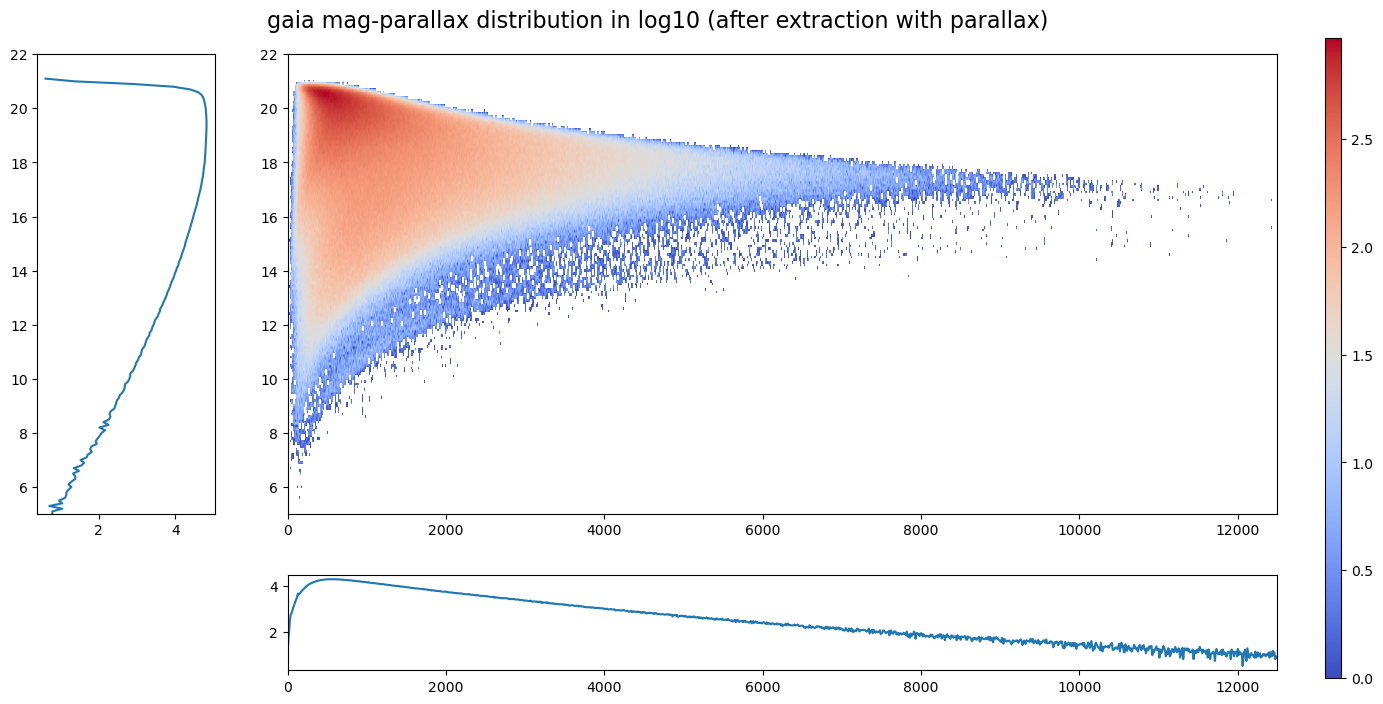

In [115]:
fig = plt.figure(figsize=(16,8))
plt.title('gaia mag-parallax distribution in log10 (after extraction with parallax)',fontsize=16,y=1.03)
plt.axis('off')
grid = GridSpec(12,20)
f1 = fig.add_subplot(grid[0:9,4:])
fx = fig.add_subplot(grid[10:,4:])
fy = fig.add_subplot(grid[0:9,0:3])
fx.plot(np.arange(0,12500,10),np.log10(h_mp[30:200,:1250].sum(axis=0)))
fx.set_xlim(0,12500)
fy.plot(np.log10(h_mp[30:200,:1250].sum(axis=1)),np.arange(5,22,0.1))
fy.set_ylim(5,22)
cf = f1.imshow(np.log10(h_mp[30:200,:1250]),cmap='coolwarm',origin='lower',extent=(0,12500,5,22),aspect='auto')
fcc = plt.axes([0.93,0.1,0.01,0.8])  # x起点，y起点，x宽，y宽
plt.colorbar(cf,cax=fcc,shrink=0.5)
plt.savefig('gaia_ms_mag_parallaxdistance_distribution_log10.png',bbox_inches='tight')

/tmp/ipykernel_19544/1148456262.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(h_mp[30:200,:1250].sum(axis=1)),np.arange(5,22,0.1))


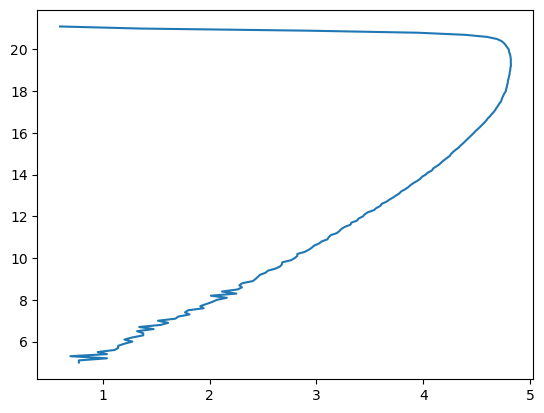

In [46]:
plt.plot(np.log10(h_mp[30:200,:1250].sum(axis=1)),np.arange(5,22,0.1))

## func

In [ ]:
def plot_distributionANDedge2D(data,data_edge,range=None):
    """
    range: index range in format of [[axis1:start,end],[axis2:start,end]] like. 
    name needed.
    """
    # data select
    if range == None:
        range = [[0,data_edge[0].size-1],[0,data_edge[1].size-1]]
    if type(data) is str:
        data = np.load(data)
    if type(data_edge) is str:
        data_edge = np.load(data_edge,allow_pickle=True)
    data = data[range[0][0]:range[0][1],range[1][0]:range[1][1]]
    data_edge[0] = data_edge[0][range[0][0]:range[0][1]]
    data_edge[1] = data_edge[1][range[1][0]:range[1][1]]
    value_range = (data_edge[0][range[0]][0],data_edge[0][range[0]][1],data_edge[1][range[1]][0],data_edge[1][range[1]][1])
    
    # fig
    fig = plt.figure(figsize=(16,8))
    plt.title('gaia mag-parallax distribution in log10 (after extraction with parallax)',fontsize=16,y=1.03)
    plt.axis('off')
    grid = GridSpec(12,24)
    f1 = fig.add_subplot(grid[0:9,3:])
    fx = fig.add_subplot(grid[10:,3:])
    fy = fig.add_subplot(grid[0:9,0:2])

    # plot
    fx.plot(data_edge[1],np.log10(data.sum(axis=0)))
    fx.set_xlim(value_range[2:4])
    fy.plot(np.log10(data.sum(axis=1)),data_edge[0])
    fy.set_ylim(value_range[0:2])
    cf = f1.imshow(np.log10(data), cmap='coolwarm', origin='lower', extent=value_range, aspect='auto')
    fcc = plt.axes([0.93,0.1,0.01,0.8])  # x起点，y起点，x宽，y宽
    plt.colorbar(cf,cax=fcc)
    plt.savefig('gaia_ms_mag_parallaxdistance_distribution_log10.png',bbox_inches='tight')

if __name__ == '__main__':
    plot_distributionANDedge2D('gaia_mag_parallax_distribution_0.1_0.1.npy','gaia_mag_parallax_distribution_0.1_0.1.edge.npy')

In [ ]:
tuple()

# apparent magnitude distribution fit

In [ ]:
x = np.load('gaia_fullsky_mag_density_allband_clear_1_001_2-25.edge.npy')
x = 

In [ ]:
def broken_linear(x,k1,k2,b1,b2,p):
    return np.piecewise(x,condlist=[x>=p,x<p],funclist=[lambda x:k1*x+b1, lambda x:k2*x+b2])
    # return base*x+b

x = de1[2][:-1][500:1800]
y = np.log10(d1[0,:,:,:].sum(axis=0).sum(axis=0))
y[np.isinf(y)]=-1e20
y = y[500:1800]
p0 = [10,0]
# p0 = [10,1,0]
para,cov = curve_fit(logfit,x,y,p0,)
para,cov